In [71]:
import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [6]:
gl.canvas.set_target('ipynb')

In [8]:
df = pd.read_table('data/ratings.dat')
rating = gl.SFrame(df[["user_id", "joke_id", "rating"]])

In [9]:
rating.head()

user_id,joke_id,rating
34888,111,-9.71875
49651,119,4.75
29027,137,2.625
25235,30,-2.4375
50499,19,2.1875
7300,51,9.3125
30219,9,2.3125
29443,134,3.1875
27069,128,1.21875
24450,120,10.0


In [10]:
m = gl.factorization_recommender.create(rating, user_id='user_id', item_id='joke_id', target='rating', solver = 'als')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 2.45875s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 7.804ms      | NA                     |

+---------+--------------+------------------------+

| 0       | 1.15s        | 4.30426                |

| 1       | 2.07s        | 3.25523                |

| 2       | 2.98s        | 3.13345                |

| 3       | 3.86s        | 3.08295                |

| 4       | 4.93s        | 3.05493                |

| 5       | 6.03s        | 3.03724                |

| 6       | 7.06s        | 3.02546                |

| 7       | 7.95s        | 3.0171                 |

| 8       | 8.83s        | 3.01098                |

| 9       | 9.73s        | 3.00641                |

| 10      | 10.62s       | 3.00293                |

| 11      | 11.52s       | 3.00019                |

| 12      | 12.41s       | 2.99798                |

| 13      | 13.29s       | 2.99616                |

| 14      | 14.34s       | 2.99467                |

| 15      | 15.22s       | 2.99344                |

| 16      | 16.07s       | 2.99241                |

| 17      | 16.91s       | 2.99155                |

| 18      | 17.83s       | 2.99082                |

| 19      | 18.71s       | 2.99017                |

| 20      | 19.69s       | 2.9896                 |

| 21      | 20.61s       | 2.98911                |

| 22      | 21.68s       | 2.98867                |

| 23      | 22.60s       | 2.98827                |

| 24      | 23.47s       | 2.98791                |

| 25      | 24.36s       | 2.98758                |

| 26      | 25.24s       | 2.98728                |

| 27      | 26.15s       | 2.987                  |

| 28      | 27.04s       | 2.98673                |

| 29      | 27.90s       | 2.98648                |

| 30      | 28.80s       | 2.98625                |

| 31      | 29.69s       | 2.98602                |

| 32      | 30.59s       | 2.9858                 |

| 33      | 31.48s       | 2.98559                |

| 34      | 32.38s       | 2.98539                |

| 35      | 33.27s       | 2.98519                |

| 36      | 34.12s       | 2.98499                |

| 37      | 35.02s       | 2.98479                |

| 38      | 35.91s       | 2.98457                |

| 39      | 36.81s       | 2.98437                |

| 40      | 37.72s       | 2.98418                |

| 41      | 38.62s       | 2.98401                |

| 42      | 39.52s       | 2.98385                |

| 43      | 40.41s       | 2.9837                 |

| 44      | 41.32s       | 2.98355                |

| 45      | 42.23s       | 2.98342                |

| 46      | 43.18s       | 2.98329                |

| 47      | 44.21s       | 2.98318                |

| 48      | 45.33s       | 2.98307                |

| 49      | 46.37s       | 2.98296                |

| FINAL   | 46.37s       | 2.98296                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [109]:
m.training_rmse


2.9829605851938847

In [14]:
pos = range(-10,10)
data = [np.array(m.predict(rating))[df.rating==i] for i in pos]
plt.violinplot(data, pos)

/home/tomas/anaconda3/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  from ipykernel import kernelapp as app


KeyboardInterrupt: 

In [ ]:
df.head()

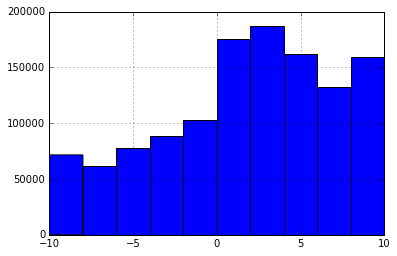

In [17]:
df.rating.hist()


In [37]:
df['ratebins'] = pd.cut(df.rating, 20, labels=[ -9.  ,  -8.  ,  -7.  ,  -6.  ,  -5.  ,  -4.  ,  -3.  ,
         -2.  ,  -1.  ,   0.  ,   1.  ,   2.  ,   3.  ,   4.  ,   5.  ,
          6.  ,   7.  ,   8.  ,   9.  ,  10.  ])

TypeError: cannot convert the series to <type 'int'>

In [27]:
df.head()

,user_id,joke_id,rating,ratebins
0,34888,111,-9.71875,-9.0
1,49651,119,4.75000,5.0
2,29027,137,2.62500,3.0
3,25235,30,-2.43750,-2.0
4,50499,19,2.18750,3.0


In [105]:
rating1 = gl.SFrame(df[["user_id", "joke_id", "rating"]])

In [45]:
m1 = gl.factorization_recommender.create(rating1, user_id='user_id', item_id='joke_id', target='ratebins', solver = 'als')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 2.19236s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 6.808ms      | NA                     |

+---------+--------------+------------------------+

| 0       | 1.39s        | 3.98557                |

| 1       | 2.44s        | 3.014                  |

| 2       | 3.50s        | 2.90153                |

| 3       | 5.00s        | 2.85478                |

| 4       | 6.21s        | 2.82897                |

| 5       | 7.50s        | 2.81264                |

| 6       | 8.46s        | 2.80174                |

| 7       | 9.54s        | 2.79401                |

| 8       | 10.70s       | 2.78836                |

| 9       | 11.74s       | 2.78414                |

| 10      | 12.73s       | 2.78091                |

| 11      | 14.10s       | 2.77837                |

| 12      | 15.07s       | 2.77631                |

| 13      | 15.94s       | 2.77462                |

| 14      | 16.89s       | 2.77324                |

| 15      | 18.23s       | 2.7721                 |

| 16      | 19.13s       | 2.77115                |

| 17      | 19.99s       | 2.77034                |

| 18      | 21.05s       | 2.76964                |

| 19      | 22.19s       | 2.76903                |

| 20      | 23.13s       | 2.76851                |

| 21      | 24.01s       | 2.76804                |

| 22      | 24.88s       | 2.76763                |

| 23      | 25.75s       | 2.76726                |

| 24      | 26.61s       | 2.76692                |

| 25      | 27.49s       | 2.76661                |

| 26      | 28.35s       | 2.76633                |

| 27      | 29.44s       | 2.76608                |

| 28      | 30.46s       | 2.76584                |

| 29      | 31.56s       | 2.76562                |

| 30      | 32.52s       | 2.76541                |

| 31      | 33.46s       | 2.76521                |

| 32      | 34.54s       | 2.76502                |

| 33      | 35.49s       | 2.76484                |

| 34      | 36.61s       | 2.76467                |

| 35      | 37.49s       | 2.7645                 |

| 36      | 38.34s       | 2.76434                |

| 37      | 39.17s       | 2.76418                |

| 38      | 40.11s       | 2.76402                |

| 39      | 40.98s       | 2.76385                |

| 40      | 41.86s       | 2.76366                |

| 41      | 42.74s       | 2.76351                |

| 42      | 43.63s       | 2.76337                |

| 43      | 44.52s       | 2.76323                |

| 44      | 45.39s       | 2.7631                 |

| 45      | 46.27s       | 2.76298                |

| 46      | 47.14s       | 2.76286                |

| 47      | 48.01s       | 2.76275                |

| 48      | 48.88s       | 2.76265                |

| 49      | 49.78s       | 2.76254                |

| FINAL   | 49.78s       | 2.76254                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [41]:
df.ratebins = [int(x) for x in df.rating]

In [47]:
m1.training_rmse

2.762542441637192

/home/tomas/anaconda3/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  from ipykernel import kernelapp as app


{u'bodies': [<matplotlib.collections.PolyCollection at 0x7f7a3f2b6e90>,
 u'cbars': <matplotlib.collections.LineCollection at 0x7f7a3f292710>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x7f7a3f2b6210>,
 u'cmins': <matplotlib.collections.LineCollection at 0x7f7a3f30b1d0>}

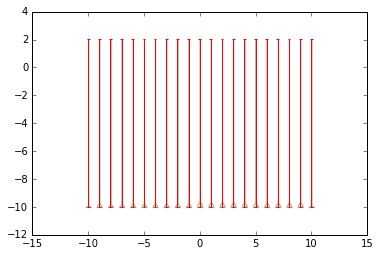

In [108]:
pos = range(-10,11)
data = [np.array(m1.predict(rating1))[df.ratebins==i] for i in pos]
plt.violinplot(data, pos)

In [51]:
df.ratebins.value_counts()

 0     138748
 2      96034
 1      93638
 3      91108
 9      86960
 4      85250
 5      76666
 6      69551
 8      69059
 7      62613
-2      45165
-9      44582
-1      44325
-3      43746
-4      40325
-5      37319
-6      35207
-7      26840
-8      26706
 10      3384
-10      1099
Name: ratebins, dtype: int64

In [64]:
dfjokes = pd.read_table('data/jokes.dat')
dfjokes['jokenum'], dfjokes['content'] = dfjokes['title'].str.split(':', 1).str
del dfjokes['title']
dfjokes

,jokenum,content
0,1,"A man visits the doctor. The doctor says, I h..."
1,2,This couple had an excellent relationship goi...
2,3,Whats 200 feet long and has 4 teeth? The fron...
3,4,Whats the difference between a man and a toil...
4,5,"Whats O. J. Simpsons web address? Slash, slas..."
5,6,Bill and Hillary Clinton are on a trip back t...
6,7,How many feminists does it take to screw in a...
7,8,Did you hear about the dyslexic devil worship...
8,9,A country guy goes into a city bar that has a...
9,10,Two cannibals are eating a clown. One turns t...


In [67]:
vecterizer = TfidfVectorizer()
vec_joke = vecterizer.fit_transform(dfjokes['content'])

In [98]:
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(vec_joke)
H = model.components_

In [99]:
item_data = pd.DataFrame(W)
item_data['joke_id']= item_data.index+1
item_data.head()

,0,1,2,3,4,joke_id
0,0.000000,0.000000,0.128699,0.000000,0.000000,1
1,0.060757,0.000000,0.008254,0.044043,0.000000,2
2,0.010829,0.065911,0.000000,0.000000,0.000000,3
3,0.000000,0.213237,0.014371,0.000000,0.002264,4
4,0.000000,0.034052,0.000000,0.000000,0.000000,5


In [106]:
m2 = gl.factorization_recommender.create(rating1, user_id='user_id',
                                         item_id='joke_id', target='rating', 
                                         item_data=gl.SFrame(item_data))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 151 items.

Data prepared in: 2.27912s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 152290 / 1218325 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 7.14286           | Not Viable                               |

| 1       | 1.78571           | 9.38812                                  |

| 2       | 0.892857          | 5.97743                                  |

| 3       | 0.446429          | No Decrease (48.944 >= 27.9932)          |

| 4       | 0.111607          | 13.0746                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.892857          | 5.97743                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 9.855ms      | 27.9393           | 5.28576               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.55s        | 18.8553           | 4.34119               | 0.892857    |

| 2       | 2.94s        | 14.2666           | 3.77596               | 0.892857    |

| 3       | 4.38s        | 13.4032           | 3.65988               | 0.892857    |

| 4       | 5.65s        | 12.9122           | 3.59219               | 0.892857    |

| 5       | 7.00s        | 12.5656           | 3.54362               | 0.892857    |

| 6       | 8.23s        | 12.3146           | 3.50801               | 0.892857    |

| 7       | 9.41s        | 12.1008           | 3.47741               | 0.892857    |

| 8       | 10.60s       | 11.9504           | 3.45572               | 0.892857    |

| 9       | 11.77s       | 11.7695           | 3.42945               | 0.892857    |

| 10      | 12.96s       | 11.6841           | 3.41697               | 0.892857    |

| 11      | 14.13s       | 11.5874           | 3.40279               | 0.892857    |

| 12      | 15.32s       | 11.5383           | 3.39557               | 0.892857    |

| 13      | 16.52s       | 11.4296           | 3.37952               | 0.892857    |

| 14      | 17.71s       | 11.3664           | 3.37015               | 0.892857    |

| 15      | 18.89s       | 11.2943           | 3.35945               | 0.892857    |

| 16      | 20.08s       | 11.2278           | 3.34953               | 0.892857    |

| 17      | 21.27s       | 11.1534           | 3.33841               | 0.892857    |

| 18      | 22.44s       | 11.135            | 3.33565               | 0.892857    |

| 19      | 23.63s       | 11.0364           | 3.32084               | 0.892857    |

| 20      | 24.80s       | 11.0263           | 3.31931               | 0.892857    |

| 21      | 26.00s       | 10.9522           | 3.30814               | 0.892857    |

| 22      | 27.17s       | 10.9053           | 3.30104               | 0.892857    |

| 23      | 28.35s       | 10.9145           | 3.30243               | 0.892857    |

| 24      | 29.51s       | 10.8469           | 3.29218               | 0.892857    |

| 25      | 30.64s       | 10.7974           | 3.28465               | 0.892857    |

| 26      | 32.36s       | 10.7301           | 3.27439               | 0.892857    |

| 27      | 33.70s       | 10.7408           | 3.27602               | 0.892857    |

| 28      | 34.88s       | 10.6801           | 3.26675               | 0.892857    |

| 29      | 36.08s       | 10.6496           | 3.26208               | 0.892857    |

| 30      | 37.27s       | 10.6631           | 3.26415               | 0.892857    |

| 31      | 38.44s       | 10.5988           | 3.25429               | 0.892857    |

| 32      | 39.65s       | 10.5633           | 3.24882               | 0.892857    |

| 33      | 40.83s       | 10.5379           | 3.24491               | 0.892857    |

| 34      | 42.01s       | 10.5291           | 3.24355               | 0.892857    |

| 35      | 43.24s       | 10.4976           | 3.2387                | 0.892857    |

| 36      | 44.48s       | 10.4711           | 3.23461               | 0.892857    |

| 37      | 45.68s       | 10.4367           | 3.22927               | 0.892857    |

| 38      | 46.81s       | 10.422            | 3.227                 | 0.892857    |

| 39      | 47.91s       | 10.3998           | 3.22356               | 0.892857    |

| 40      | 49.07s       | 10.386            | 3.22142               | 0.892857    |

| 41      | 50.25s       | 10.3455           | 3.21513               | 0.892857    |

| 42      | 51.46s       | 10.3238           | 3.21175               | 0.892857    |

| 43      | 52.65s       | 10.2989           | 3.20787               | 0.892857    |

| 44      | 53.86s       | 10.2811           | 3.20509               | 0.892857    |

| 45      | 55.00s       | 10.2936           | 3.20705               | 0.892857    |

| 46      | 56.10s       | 10.2314           | 3.19733               | 0.892857    |

| 47      | 57.24s       | 10.2585           | 3.20157               | 0.892857    |

| 48      | 58.34s       | 10.2023           | 3.19278               | 0.892857    |

| 49      | 59.48s       | 10.1862           | 3.19026               | 0.892857    |

| 50      | 1m 0s        | 10.1515           | 3.18482               | 0.892857    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 10.994

Final training RMSE: 3.31444

In [107]:
m2.training_rmse

3.3144439278438727

In [103]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df_rating['rating'], predictions))

print "graphlab's reported rmse:", rec['training_rmse']
print "calculated rmse:", rmse  

NameError: name 'df_rating' is not defined